# 1. 데이터 파일 '경기도인구데이터'.csv파일을 이용하여 다음 내용을 파이썬 pandas라이브러리를 사용해서 결과를 출력하세요

In [127]:
import pandas as pd
import numpy as np

가. 파일 내용을 읽은 후 상위 5개 데이터 확인

In [128]:
df=pd.read_csv("C:/Users/student/Downloads/datasets/경기도인구데이터.csv", encoding='CP949')
df.head()

,구분,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
1,수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
2,수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
3,수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
4,성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


나. 배열 객체의 크기 확인 

In [129]:
len(df)

44

다. 중복 지역 존재 여부 확인 

In [131]:
df.duplicated(['구분']).count() # 중복 없음

44

라. 2017년 수원시 인구의 합

In [132]:
su = df[(df.구분.str.contains('수원'))]
sum(su['2017'])

1202628

마. 2017년 인구가 50만이상이 지역 출력

In [133]:
df.loc[df['2017']>500000,['구분']]

,구분
6,성남시분당구
23,남양주시
36,화성시


바. 2017년 경기도 전체시에 대한 시단위 인구 평균 평균을 출력하시오 (전체인구/시개수)

In [134]:
ingu=sum(df['2017'])
si=len(df[(df.구분.str.contains('시'))])
print(ingu/si)

313964.7073170732


---

# 2. 선형회귀 분석을 수행합니다. 다음 요청을 파이썬 코드로 완성하시오

In [135]:
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns


가. 데이터 파일 auto-mpg.csv로부터 로드한 데이터들의 컬럼 이름 (변수, 특성 이름) 지정 다음과 같이 정의합니다.
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

In [136]:
auto=pd.read_csv("C:/Users/student/Downloads/datasets/auto-mpg.csv", names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name'])
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [137]:
auto['horsepower']= auto['horsepower'].replace('?',0)

In [138]:
auto['horsepower']=auto['horsepower'].astype('float')

In [139]:
auto['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [140]:
auto['horsepower']=auto['horsepower'].replace(0,auto['horsepower'].mean())

나. 종속변수(mpg)와 다른 변수('cylinders','horsepower', 'weight')간의 선형관계여부를 matplotlib 또는 seaborn을 사용하여 산점도를 그리고 회귀선을 그리는 코드 

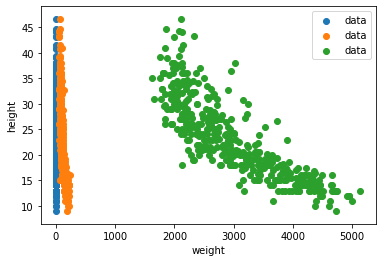

In [141]:
# polyorder, residuals, _, _, _ = sp.polyfit(x, y, 1, full=True)
# model1=sp.polyld(polyorder)

plt.scatter( auto['cylinders'], auto['mpg'], label = "data")
plt.scatter( auto['horsepower'],auto['mpg'],  label = "data")
plt.scatter( auto['weight'],auto['mpg'],  label = "data")
plt.legend(loc = "best")
plt.xlabel('weight')
plt.ylabel('height')
plt.show()


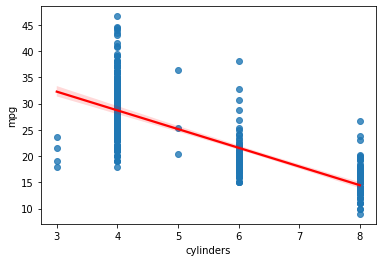

In [142]:
sns.regplot(x=auto['cylinders'], y=auto['mpg'],line_kws={'color': 'red'})

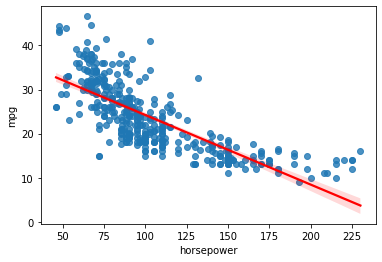

In [143]:
sns.regplot(x=auto['horsepower'], y=auto['mpg'],line_kws={'color': 'red'})

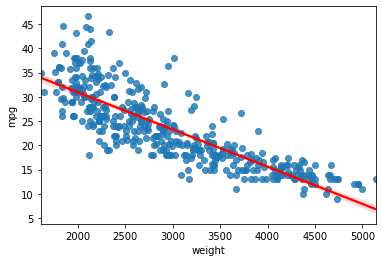

In [144]:
sns.regplot(x=auto['weight'], y=auto['mpg'],line_kws={'color': 'red'})

In [145]:
import statsmodels.api as sm

다. 선형 관계 그래프에서 선형관계가 높은 독립변수을 선택하고,
훈련 데이터와 테스트 데이터로 분리하는 코드 ( train data 와 test data를 7:3 비율로 분리)

In [146]:
reg = sm.OLS.from_formula("mpg ~ cylinders", auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           4.50e-81
Time:                        15:02:05   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9493      0.833     51.557      0.000      41.312      44.587
cylinders     -3.5629      0.146    -24.435      0.000      -3.850      -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
reg = sm.OLS.from_formula("mpg ~ horsepower", auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     583.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           7.11e-80
Time:                        15:02:06   Log-Likelihood:                -1202.4
No. Observations:                 398   AIC:                             2409.
Df Residuals:                     396   BIC:                             2417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0080      0.727     55.031      0.000      38.579      41.437
horsepower    -0.1579      0.007    -24.153      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       21.748   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.920
Skew:                           0.555   Prob(JB):                     6.40e-06
Kurtosis:                       3.457   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
reg = sm.OLS.from_formula("mpg ~ weight", auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          2.97e-103
Time:                        15:02:06   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
# 다. 선형 관계 그래프에서 선형관계가 높은 독립변수을 선택하고,
# 훈련 데이터와 테스트 데이터로 분리하는 코드 ( train data 와 test data를 7:3 비율로 분리)
from sklearn.model_selection import train_test_split
x = np.array(auto['weight']).reshape(-1,1)
y = np.array(auto['mpg']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

라. 단순 선형회귀분석 객체를 생성하여 학습시키는 코드 

In [151]:
# 라. 단순 선형회귀분석 객체를 생성하여 학습시키는 코드
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

마. 결정계수를 출력하는 코드

In [152]:
# 마. 결정계수를 출력하는 코드

from sklearn.metrics import mean_squared_error
print('score = ', mlr.score(X =x_train, y=y_train))

score =  0.6972295070654326


바. 테스트 데이터로부터 생성된 모델을 이용하여 종속변수의 값을 예측하는 코드

In [153]:
# 바. 테스트 데이터로부터 생성된 모델을 이용하여 종속변수의 값을 예측하는 코드
predict = mlr.predict(x_test)

사. 정답 label과 예측값을 비교하는 라인 차트를 그리는 코드

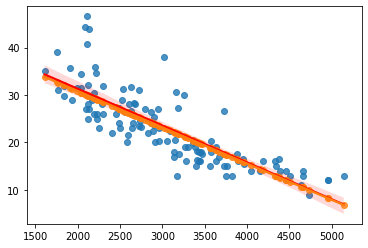

In [168]:
sns.regplot(x=x_test, y=y_test,line_kws={'color': 'red'})
sns.regplot(x=x_test, y=predict)

# 3. decision tree

결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 
지도 학습 모델 중 하나입니다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다. 매, 펭귄, 돌고래, 곰을
구분한다고 생각해봅시다. 매와 펭귄은 날개를 있고, 돌고래와 곰은 날개가 없습니다. '날개가 있나요?'라는 질문을 통해 매,
펭귄 / 돌고래, 곰을 나눌 수 있습니다. 매와 펭귄은 '날 수 있나요?'라는 질문으로 나눌 수 있고, 돌고래와 곰은 '지느러미가
있나요?'라는 질문으로 나눌 수 있습니다. 아래는 결정 트리를 도식화한 것입니다

이렇게 특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 합니다. 
한번의 분기 때마다 변수 영역을 두 개로 구분합니다. 결정 트리에서 질문이나 정답을 담은 네모 상자를 노드(Node)라고 합니다. 
맨 처음 분류 기준 (즉, 첫 질문)을 Root Node라고 하고, 맨 마지막 노드를 Terminal Node 혹은 Leaf Node라고 합니다.

가지치기(Pruning)  
오버피팅을 막기 위한 전략으로 가지치기(Pruning)라는 기법이 있습니다. 트리에 가지가 너무 많다면 오버피팅이라 볼 수 있습니다. 가지치기란 나무의 가지를 치는 작업을 말합니다. 즉, 최대 깊이나 터미널 노드의 최대 개수, 혹은 한 노드가 분할하기 위한 최소 데이터 수를 제한하는 것입니다. min_sample_split 파라미터를 조정하여 한 노드에 들어있는 최소 데이터 수를 정해줄 수 있습니다. min_sample_split = 10이면 한 노드에 10개의 데이터가 있다면 그 노드는 더 이상 분기를 하지 않습니다. 또한, max_depth를 통해서 최대 깊이를 지정해줄 수도 있습니다. max_depth = 4이면, 깊이가 4보다 크게 가지를 치지 않습니다. 가지치기는 사전 가지치기와 사후 가지치기가 있지만 sklearn에서는 사전 가지치기만 지원합니다.

알고리즘: 엔트로피(Entropy), 불순도(Impurity)  
불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻합니다. 아래 그림에서 위쪽 범주는 불순도가 낮고, 아래쪽 범주는 불순도가 높습니다. 바꾸어 말하면 위쪽 범주는 순도(Purity)가 높고, 아래쪽 범주는 순도가 낮습니다. 위쪽 범주는 다 빨간점인데 하나만 파란점이므로 불순도가 낮다고 할 수 있습니다. 반면 아래쪽 범주는 5개는 파란점, 3개는 빨간점으로 서로 다른 데이터가 많이 섞여 있어 불순도가 높습니다.